# EASC 3170 Gravity Corrections Lab

### This lab is designed to give you hands on experience with applying gravity corrections to a real gravity data set.

#### Data: 

You will be working with a 2-D profile of gravity data collected by Stephanie Abbott (M.Sc.) and Dr. Alison Leitch within the Valentine Lake gold property. The dataset is a 2-D profile of gravity measurements (28 stations) acquired across strike of the gold bearing alteration zone.

#### Corrections: 

The csv file you will start with contains the raw gravity data and GPS measurements collected by the CG-5 gravimeter over a profile of the Valentine Lake Gold Deposit. The name of the file you will be working with is "VL_GRAV.csv". This file is already saved in your work folder.

The gravimeter is able to take care of instrument drift and earth tide corrections automatically while the data is acquired in the field. So, we don't need to account for these corrections today because they are already taken care of! You will perform an absolute gravity calculation, latitude correction, free-air correction, and Bouguer correction using the relative gravity data provided.

#### Lab Workflow:

You will complete this lab using a series of python commands within this notebook that will allow you to make corrections to the Valentine Lake gravity data.

Don't worry if you have no experience with python programming! You will not be doing any intensive programming during this lab. 

All you need to do is fill in the blanks where specified within the python code already provided to you for doing gravity corrections.

## First we need to import the python modules we will be using today. To execute python commands within jupyter notebook, press shift+enter.

In [1]:
# Import python libraries

import numpy as np
import matplotlib as plt
import pandas as pd

## Next, we need to import the Valentine Lake gravity data. This is saved as a csv file in your lab folder.

## You will be importing the gravity data as a pandas data frame.

In [2]:
data = pd.read_csv("VL_GRAV.csv")

## Now that the data is imported, have a look at it! To to this, shift+enter in the following cell. Note the column names in the data frame.

In [3]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV
0,1,370.201150,48.379429,-57.112198,6227.873577
1,2,377.575450,48.379795,-57.113476,6226.274121
2,3,384.898467,48.380077,-57.114788,6224.523559
3,4,392.732850,48.380485,-57.115967,6222.742097
4,5,400.101850,48.380867,-57.117367,6221.059319
5,6,400.193450,48.380867,-57.117367,6221.028923
6,7,404.868150,48.381176,-57.118767,6219.909682
7,8,409.153900,48.381023,-57.120045,6218.876567
8,9,414.486200,48.381260,-57.121323,6217.680358
9,10,417.307600,48.382080,-57.122330,6217.074088


## Make a map view scatter plot to show the location of the measurement locations. Make sure the x-axis is "Latitude" and the y-axis is "Longitude" and that the points are coloured according to the "Elevation" coloumn.

## In additon, make a plot showing how elevation change with each station along the profile.

Text(0.5, 0, 'Station Number')

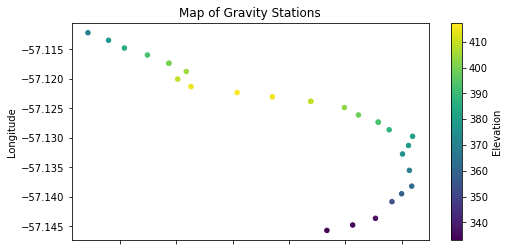

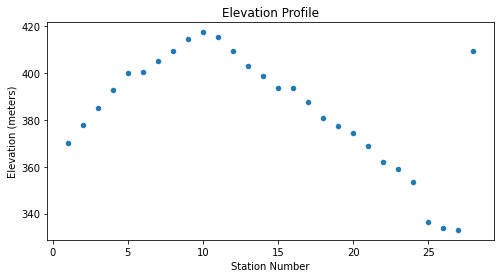

In [4]:
ax1 = data.plot.scatter(x="Latitude", y="Longitude", c ="Elevation" , cmap='viridis',figsize=(8,4), title='Map of Gravity Stations') # Map view
ax1.set_ylabel("Longitude")
ax1.set_xlabel("Latitude")


ax = data.plot.scatter(x="Station", y="Elevation", figsize=(8,4), title='Elevation Profile') # Profile view
ax.set_ylabel("Elevation (meters)")
ax.set_xlabel("Station Number")

## Calculate the Absolute Gravity for each measurment location

Prior to calculating corrections such as the latitude correction, we need to calculate the absolute gravity for each relative gravity measurement. 

Do do this, we add an absolute gravity measurement value acquired from a seismic reference station on the same day the realtive gravity measuremnts were acquired at Valentine Lake. The absolute gravity value recorded from the MUN seismic vault was 974615.66 mGal.

Create a new column of data for the absolute gravity measurments.

In [7]:
ABS_value = 974615.66

data["ABS_GRAV"] = data['RL_GRAV'] + ABS_value

## Calculate the Latitude correction

Prior to calculating the latitude correction, we need to convert the latiude measurements into radians so that in can be used in the WGS84 forumula.

In [8]:
## Calculate latitude in radians

data["Lat_rad"] = data['Latitude'] * (np.pi / 180)

## Look at the updated spreadsheet!

In [9]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427


## Now you will implment the WGS84 formula to calculate the latitude correction for each gravity station. To make this calculation a bit easier (and elss long), we will split the WGS84 into two compents ("a" and "b").

In [10]:
## Compenents for the WGS84 Formula

a = (1 +( 5.278895)*(10**-3)*(np.sin(data['Lat_rad'])**2))

b = (2.3462*(10**-5)*(np.sin(data['Lat_rad'])**4))

# WGS84 Calculation

data["WGS84"] = 978031.846* (a + b)

In [11]:
## WGS84 Calculation

#data["WGS84"] = 978031.846*(1 +( 5.278895)*(10**-3)*(np.sin(data['Lat_rad'])**2)+(2.3462*(10**-5)*(np.sin(data['Lat_rad'])**4))) 

## Look at the updated spreadsheet!

In [12]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad,WGS84
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380,980924.290963
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387,980924.323895
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392,980924.349281
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399,980924.385981
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405,980924.420288
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405,980924.420288
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411,980924.448076
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408,980924.434353
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412,980924.455621
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427,980924.529380


## As the final step for the latitude correction, we need to subtract the latitude correction from the absolute gravity values for each station.

## The end result will be latitude corrected gravity measurements that will be added as a new column in your data frame.

In [13]:
## Calculate latitude corrected gravity

data["Lat_cor"] = data['ABS_GRAV'] - data['WGS84']

## Look at the updated spreadsheet!

In [14]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad,WGS84,Lat_cor
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380,980924.290963,-80.757386
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387,980924.323895,-82.389774
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392,980924.349281,-84.165722
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399,980924.385981,-85.983884
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405,980924.420288,-87.700969
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405,980924.420288,-87.731365
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411,980924.448076,-88.878394
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408,980924.434353,-89.897786
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412,980924.455621,-91.115263
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427,980924.529380,-91.795292


## Calculating the Free-air correction

Now we will calculate the free-air correction and apply it to our latitude corrected gravity values.

First we need to calculate how gravity changes for each meter the station site lies above the sea surface geoid. Remember this is calculated using:

### g = G* (Me/r^2)


### dg/dr = -2* G* (Me/r^3)

where:
      
      G = 6.67 N*m^2/kg^2 (Gravitational Constant)
      
      Me = 5.972 x 10^24 (Mass of the Earth)
      
      r = 6370 km (Radius of the Earth)
      
### Lets do this calculation using python!

In [15]:
## Free-air correction calculation 

G = 6.67*10**-11 # Gravitational constant
M = 5.972*10**24 # Mass of the Earth
r = 6370*10**3 # Radius of the Earth (meters)

fg = (-2)*(G)*(M/r**3) # Free-air correction constant
fg

-3.08217527064422e-06

## The value you calculated above has the units m/s^2.

## Remember, "mgal" is the commonly used unit for gravity surveying. So, we need to convert the previous calculation to mgal using the relationship:

### 1 mgal = 10^-5 m/s^2

In [16]:
## Now convert m/s^2 to mgal - remember 1 mgal = 10^-5 m/s^2

fg_mgal = abs(fg*10**5)
fg_mgal 

0.308217527064422

## Now we can calculate the free air corection using the formula:


### FAC = 0.3082 x h (mgal) where h = elevation


### Remember to use the the elevation column in your dataset to calulate the free-air correction.

In [17]:
## Calculate free-air correction

data["FA_cor"] = data["Elevation"] * fg_mgal

## Look at the updated spreadsheet!

In [18]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad,WGS84,Lat_cor,FA_cor
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380,980924.290963,-80.757386,114.102483
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387,980924.323895,-82.389774,116.375371
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392,980924.349281,-84.165722,118.632454
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399,980924.385981,-85.983884,121.047148
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405,980924.420288,-87.700969,123.318403
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405,980924.420288,-87.731365,123.346636
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411,980924.448076,-88.878394,124.787460
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408,980924.434353,-89.897786,126.108403
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412,980924.455621,-91.115263,127.751912
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427,980924.529380,-91.795292,128.621516


## Now that the free-air correction is calculated, add the free-air correction to the latitude corrected gravity values in your data frame to obtain the free-anomaly.

In [19]:
## Calculate free-air anomaly

data["FA_anom"] = data["Lat_cor"] + data["FA_cor"]

## Look at the updated spreadsheet!

In [20]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad,WGS84,Lat_cor,FA_cor,FA_anom
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380,980924.290963,-80.757386,114.102483,33.345097
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387,980924.323895,-82.389774,116.375371,33.985598
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392,980924.349281,-84.165722,118.632454,34.466731
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399,980924.385981,-85.983884,121.047148,35.063264
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405,980924.420288,-87.700969,123.318403,35.617433
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405,980924.420288,-87.731365,123.346636,35.615270
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411,980924.448076,-88.878394,124.787460,35.909066
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408,980924.434353,-89.897786,126.108403,36.210617
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412,980924.455621,-91.115263,127.751912,36.636648
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427,980924.529380,-91.795292,128.621516,36.826225


## Before you move on to the Bouguer correction, plot the free-air anomaly profile to see what it looks like.

## Aditionally, make an elevation plot to see if the two profiles look similar!

<AxesSubplot:xlabel='Station', ylabel='Elevation'>

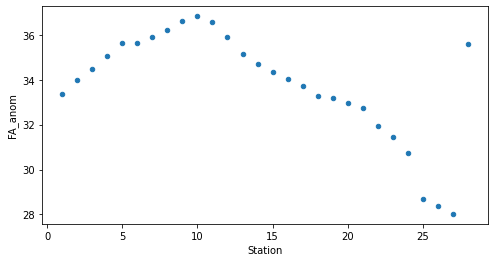

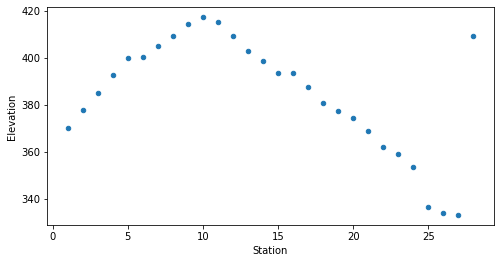

In [21]:
data.plot.scatter(x="Station", y="FA_anom", figsize=(8,4))
data.plot.scatter(x="Station", y="Elevation", figsize=(8,4))

## Calculating the Bouguer Correction

Recall the equation for the Bouguer slab (gslab): 

### gslab = 2pi* G* p* h

where 
      
      pi = 3.14159...
      G = gravitational constant
      p = bouguer slab desnity
      h = elevation
      
Using a typical crustal density value = 2670 kg/m^3 this equation becomes:

### gslab = 0.112*h (mgal)

### Using the equation mentioned above, calculate the Bouguer slab correction using the elevation column in your dataset.

In [22]:
## Calculate Bouguer slab correction

data["Boug_Cor"] =  data["Elevation"] * (-0.112)

## Look at the updated spreadsheet!

In [23]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad,WGS84,Lat_cor,FA_cor,FA_anom,Boug_Cor
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380,980924.290963,-80.757386,114.102483,33.345097,-41.462529
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387,980924.323895,-82.389774,116.375371,33.985598,-42.288450
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392,980924.349281,-84.165722,118.632454,34.466731,-43.108628
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399,980924.385981,-85.983884,121.047148,35.063264,-43.986079
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405,980924.420288,-87.700969,123.318403,35.617433,-44.811407
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405,980924.420288,-87.731365,123.346636,35.615270,-44.821666
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411,980924.448076,-88.878394,124.787460,35.909066,-45.345233
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408,980924.434353,-89.897786,126.108403,36.210617,-45.825237
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412,980924.455621,-91.115263,127.751912,36.636648,-46.422454
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427,980924.529380,-91.795292,128.621516,36.826225,-46.738451


### Add the bouguer correction to the free-anomaly gravity values to obatin the Bouguer anomaly values.

In [24]:
## Calculate Bouguer anomaly

data["Boug_anom"] =  data["FA_anom"] + data["Boug_Cor"]

### Now that you have completed all the corrections, have a look at the final spreadsheet!

In [25]:
data

,Station,Elevation,Latitude,Longitude,RL_GRAV,ABS_GRAV,Lat_rad,WGS84,Lat_cor,FA_cor,FA_anom,Boug_Cor,Boug_anom
0,1,370.201150,48.379429,-57.112198,6227.873577,980843.533577,0.844380,980924.290963,-80.757386,114.102483,33.345097,-41.462529,-8.117432
1,2,377.575450,48.379795,-57.113476,6226.274121,980841.934121,0.844387,980924.323895,-82.389774,116.375371,33.985598,-42.288450,-8.302853
2,3,384.898467,48.380077,-57.114788,6224.523559,980840.183559,0.844392,980924.349281,-84.165722,118.632454,34.466731,-43.108628,-8.641897
3,4,392.732850,48.380485,-57.115967,6222.742097,980838.402097,0.844399,980924.385981,-85.983884,121.047148,35.063264,-43.986079,-8.922815
4,5,400.101850,48.380867,-57.117367,6221.059319,980836.719319,0.844405,980924.420288,-87.700969,123.318403,35.617433,-44.811407,-9.193974
5,6,400.193450,48.380867,-57.117367,6221.028923,980836.688923,0.844405,980924.420288,-87.731365,123.346636,35.615270,-44.821666,-9.206396
6,7,404.868150,48.381176,-57.118767,6219.909682,980835.569682,0.844411,980924.448076,-88.878394,124.787460,35.909066,-45.345233,-9.436167
7,8,409.153900,48.381023,-57.120045,6218.876567,980834.536567,0.844408,980924.434353,-89.897786,126.108403,36.210617,-45.825237,-9.614620
8,9,414.486200,48.381260,-57.121323,6217.680358,980833.340358,0.844412,980924.455621,-91.115263,127.751912,36.636648,-46.422454,-9.785806
9,10,417.307600,48.382080,-57.122330,6217.074088,980832.734088,0.844427,980924.529380,-91.795292,128.621516,36.826225,-46.738451,-9.912226


### Lastly, lets have a look at what the data looks like! Plot a profile of how the Bouguer anomaly changes with Easting. 

### Compare this to the free-air anomaly profile you computed previously.

<AxesSubplot:xlabel='Station', ylabel='FA_anom'>

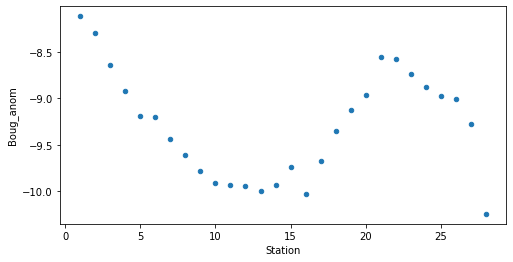

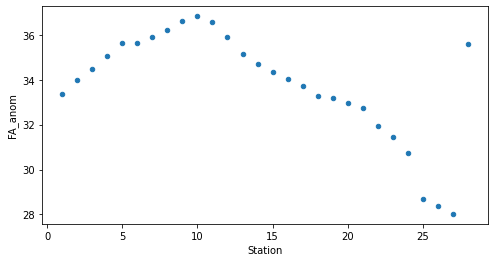

In [26]:
data.plot.scatter(x="Station", y="Boug_anom", figsize=(8,4)) # Bouguer anomaly profile

data.plot.scatter(x="Station", y="FA_anom", figsize=(8,4)) # Free-air anomaly profile